## Logistic Regression With ROC curve and ROC AUC score

In [1]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
from collections import Counter

In [4]:
## Generating 2 class Dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [5]:
Counter(y)

Counter({np.int64(0): 501, np.int64(1): 499})

In [6]:
## Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [7]:
## Creating a dummy model that will always give o/p as 0 (majority class)
dummy_model = [0 for _ in range(len(y_test))]

In [8]:
pd.DataFrame(dummy_model).shape

(300, 1)

In [9]:
## Just prforming basic model training
model = LogisticRegression()

In [10]:
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
## Probability based prediction
model_prob = model.predict_proba(X_test)

In [12]:
model_prob

array([[6.74190873e-04, 9.99325809e-01],
       [9.19840444e-01, 8.01595557e-02],
       [5.43753925e-01, 4.56246075e-01],
       [1.94320087e-01, 8.05679913e-01],
       [8.96955241e-01, 1.03044759e-01],
       [5.38990241e-01, 4.61009759e-01],
       [1.71352090e-01, 8.28647910e-01],
       [2.90543366e-01, 7.09456634e-01],
       [1.02301813e-01, 8.97698187e-01],
       [1.23538942e-01, 8.76461058e-01],
       [9.99667210e-01, 3.32790214e-04],
       [1.76332587e-01, 8.23667413e-01],
       [8.26464125e-01, 1.73535875e-01],
       [4.77087470e-01, 5.22912530e-01],
       [3.12717643e-01, 6.87282357e-01],
       [1.73398482e-01, 8.26601518e-01],
       [5.54531818e-02, 9.44546818e-01],
       [3.53323048e-01, 6.46676952e-01],
       [8.99702877e-01, 1.00297123e-01],
       [8.02792608e-01, 1.97207392e-01],
       [9.90033818e-01, 9.96618235e-03],
       [5.10780820e-01, 4.89219180e-01],
       [9.88330747e-02, 9.01166925e-01],
       [1.25107454e-03, 9.98748925e-01],
       [8.800607

In [13]:
## Getting outcomes of only psotive class for the purpose of ROC curve
model_prob = model_prob[:,1]

In [14]:
model_prob

array([9.99325809e-01, 8.01595557e-02, 4.56246075e-01, 8.05679913e-01,
       1.03044759e-01, 4.61009759e-01, 8.28647910e-01, 7.09456634e-01,
       8.97698187e-01, 8.76461058e-01, 3.32790214e-04, 8.23667413e-01,
       1.73535875e-01, 5.22912530e-01, 6.87282357e-01, 8.26601518e-01,
       9.44546818e-01, 6.46676952e-01, 1.00297123e-01, 1.97207392e-01,
       9.96618235e-03, 4.89219180e-01, 9.01166925e-01, 9.98748925e-01,
       1.19939253e-01, 9.65172294e-03, 6.25724165e-01, 9.77606909e-01,
       3.56187875e-02, 1.86042701e-02, 3.57901844e-01, 2.61845696e-02,
       2.32160980e-01, 9.67711850e-01, 5.22332907e-01, 6.53656208e-01,
       1.53772964e-02, 2.56121980e-02, 7.88766865e-01, 2.31590934e-02,
       9.43088035e-01, 8.52350849e-01, 1.33521065e-02, 4.00524634e-04,
       5.30303930e-02, 5.26483686e-02, 9.98623014e-01, 6.50234894e-01,
       9.07343469e-01, 4.30780844e-02, 2.09623419e-02, 2.30408484e-02,
       9.46586259e-02, 5.14534062e-02, 5.68941486e-01, 9.90312178e-01,
      

In [15]:
## Calculating the ROC AUC score
dummy_model_score = roc_auc_score(y_test, dummy_model)
model_score = roc_auc_score(y_test, model_prob)

In [16]:
dummy_model_score

np.float64(0.5)

In [17]:
model_score

np.float64(0.9044392939917989)

![Screenshot 2024-12-27 at 7.20.23 PM.png](<attachment:Screenshot 2024-12-27 at 7.20.23 PM.png>)
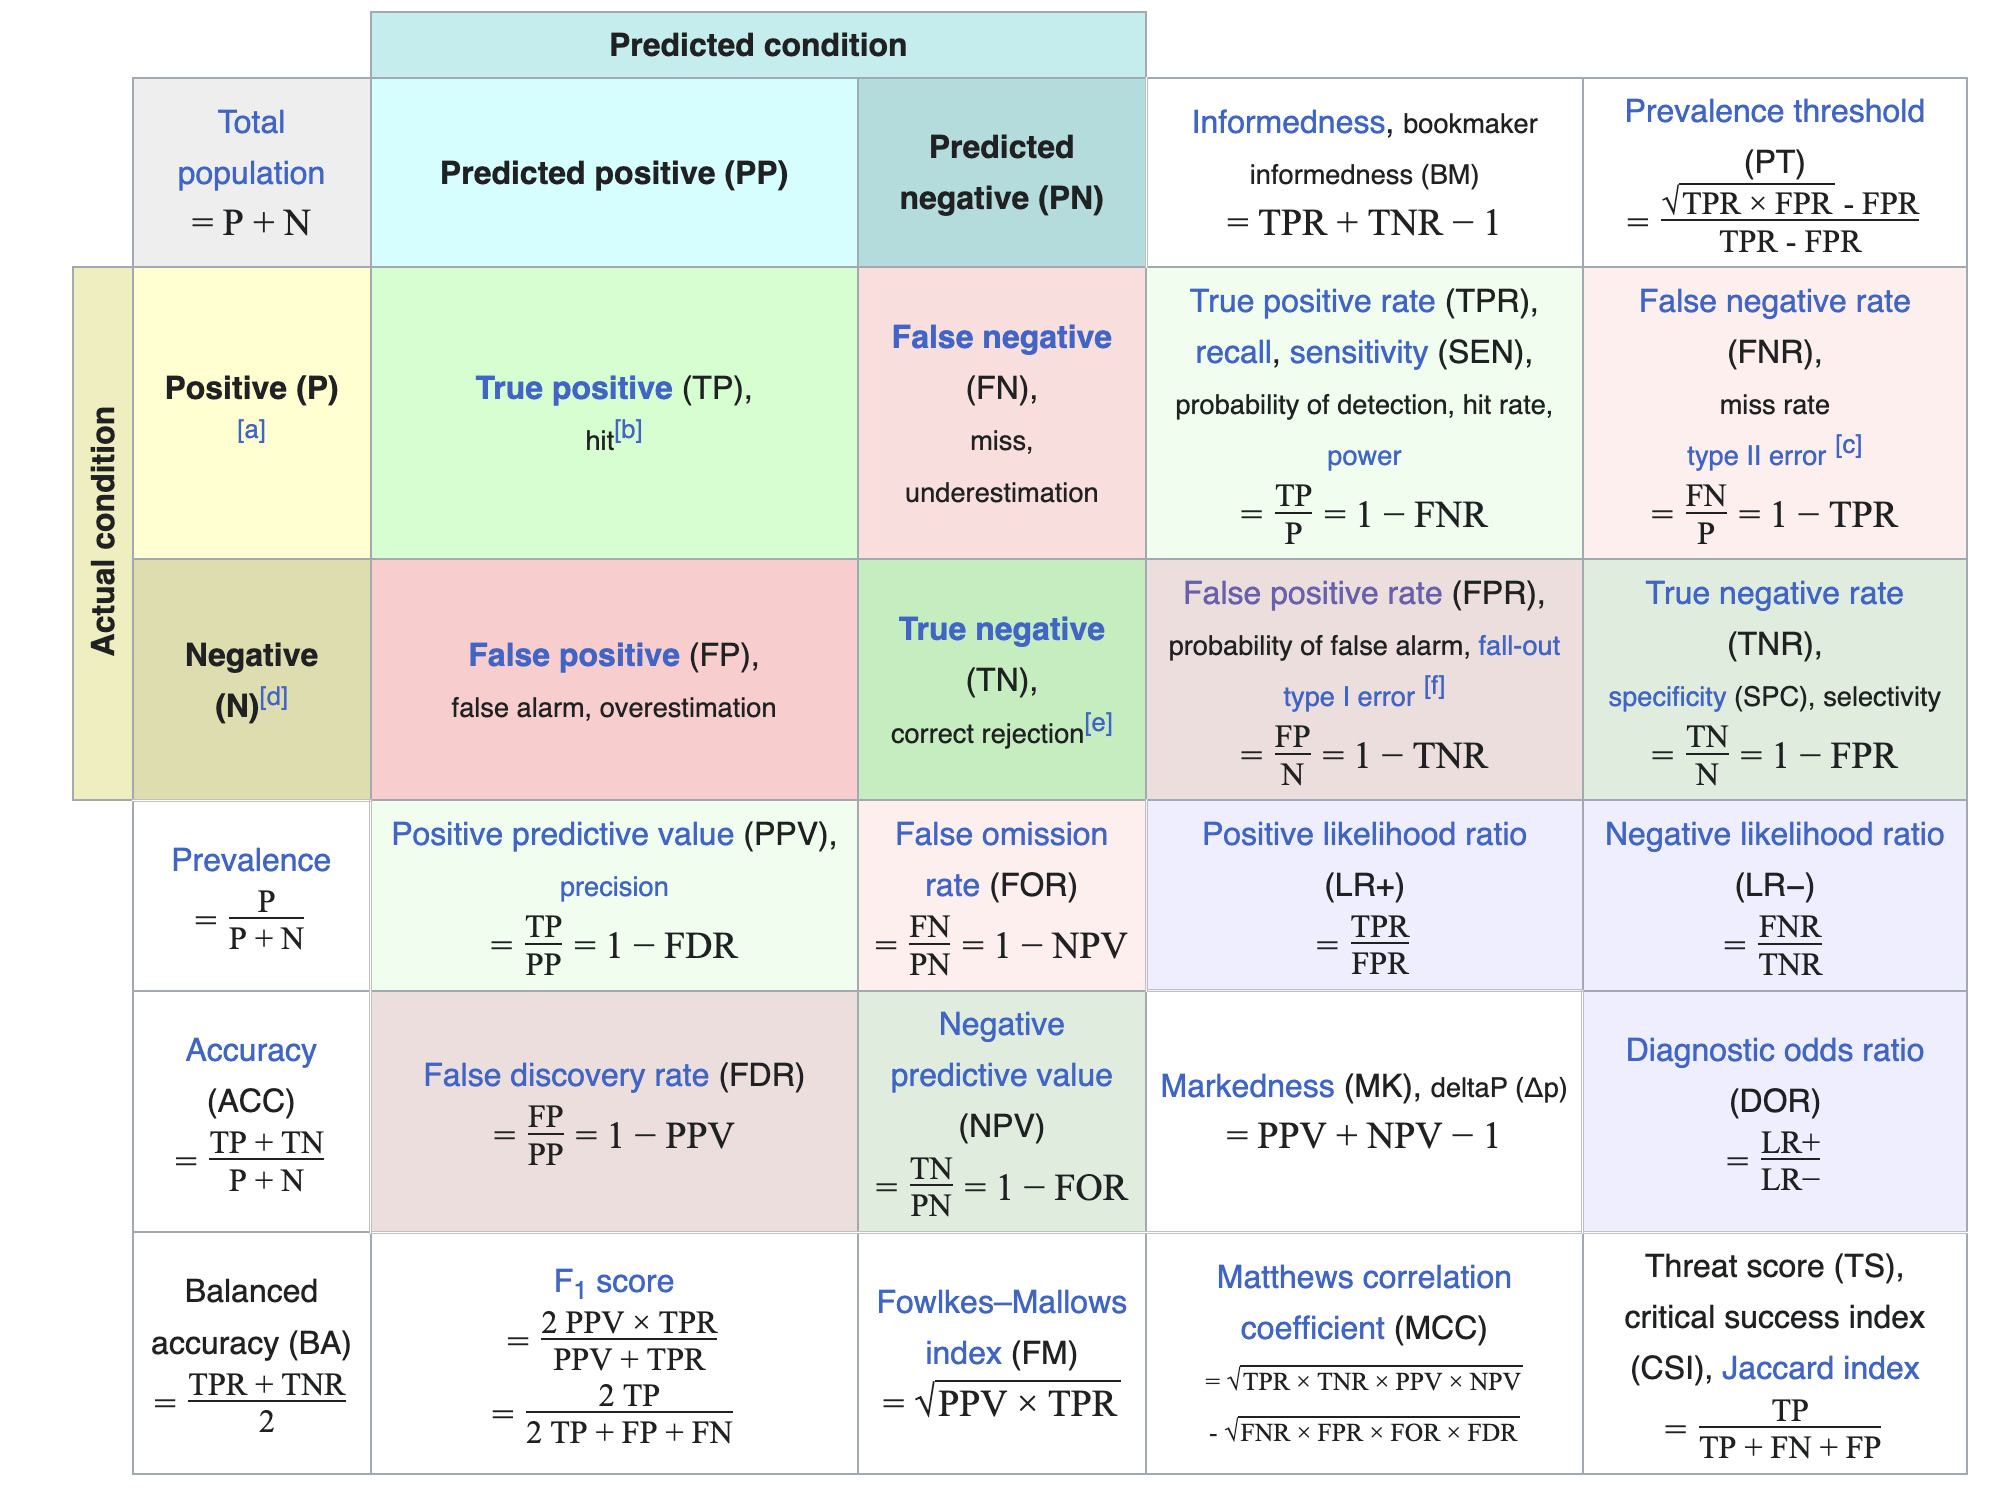

In [18]:
## Calculate ROC Curves
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model)
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)

In [19]:
model_fpr, model_tpr

(array([0.        , 0.        , 0.        , 0.00632911, 0.00632911,
        0.01265823, 0.01265823, 0.01898734, 0.01898734, 0.02531646,
        0.02531646, 0.03797468, 0.03797468, 0.05063291, 0.05063291,
        0.05696203, 0.05696203, 0.06329114, 0.06329114, 0.06962025,
        0.06962025, 0.07594937, 0.07594937, 0.09493671, 0.09493671,
        0.10126582, 0.10126582, 0.10759494, 0.10759494, 0.11392405,
        0.11392405, 0.12025316, 0.12025316, 0.14556962, 0.14556962,
        0.17088608, 0.17088608, 0.1835443 , 0.1835443 , 0.22151899,
        0.22151899, 0.2278481 , 0.2278481 , 0.23417722, 0.23417722,
        0.31012658, 0.31012658, 0.32911392, 0.32911392, 0.37974684,
        0.37974684, 0.39873418, 0.39873418, 0.42405063, 0.42405063,
        0.5       , 0.5       , 0.53164557, 0.53164557, 0.5443038 ,
        0.5443038 , 0.56329114, 0.56329114, 0.8164557 , 0.8164557 ,
        0.96835443, 0.96835443, 1.        ]),
 array([0.        , 0.00704225, 0.14084507, 0.14084507, 0.24647887,
  

In [20]:
thresholds

array([           inf, 9.99841431e-01, 9.90312178e-01, 9.89789604e-01,
       9.69840515e-01, 9.67711850e-01, 9.54350198e-01, 9.49376937e-01,
       9.37595993e-01, 9.36574071e-01, 9.30988369e-01, 9.26229039e-01,
       9.09517229e-01, 9.07343469e-01, 8.43163099e-01, 8.42880786e-01,
       8.23496913e-01, 8.19906654e-01, 8.05679913e-01, 8.03023949e-01,
       7.88766865e-01, 7.83267314e-01, 7.79808524e-01, 7.73542569e-01,
       7.73042351e-01, 7.66533994e-01, 7.59977292e-01, 7.55728997e-01,
       7.38345078e-01, 7.33647339e-01, 6.87282357e-01, 6.53656208e-01,
       6.50234894e-01, 6.25724165e-01, 6.10931389e-01, 5.68941486e-01,
       5.22332907e-01, 5.07118055e-01, 4.88670078e-01, 4.61009759e-01,
       4.59292509e-01, 4.56246075e-01, 4.31124193e-01, 4.28500867e-01,
       4.10339171e-01, 3.16619731e-01, 3.09453767e-01, 3.01031985e-01,
       2.78367698e-01, 1.82394320e-01, 1.77011298e-01, 1.66057291e-01,
       1.49173917e-01, 1.31183339e-01, 1.28392734e-01, 9.46586259e-02,
      

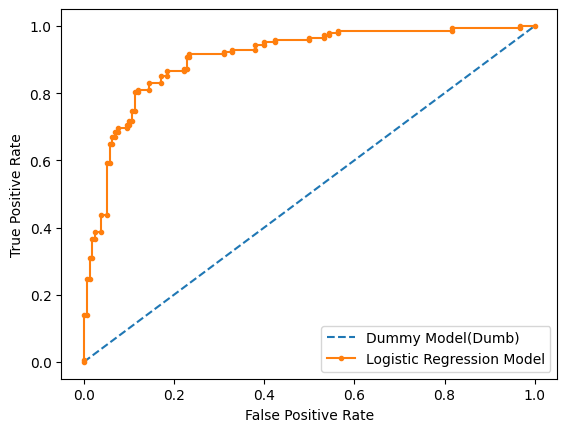

In [21]:
## Plotting the ROC curve for the model
plt.plot(dummy_fpr, dummy_tpr, linestyle = '--', label = 'Dummy Model(Dumb)')
plt.plot(model_fpr, model_tpr, marker = '.', label = 'Logistic Regression Model')

## Axis Labels
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

## Legend
plt.legend()

plt.show()

In [22]:
import numpy as np

In [25]:
import seaborn as sns

In [27]:
plt.clf()

<Figure size 640x480 with 0 Axes>

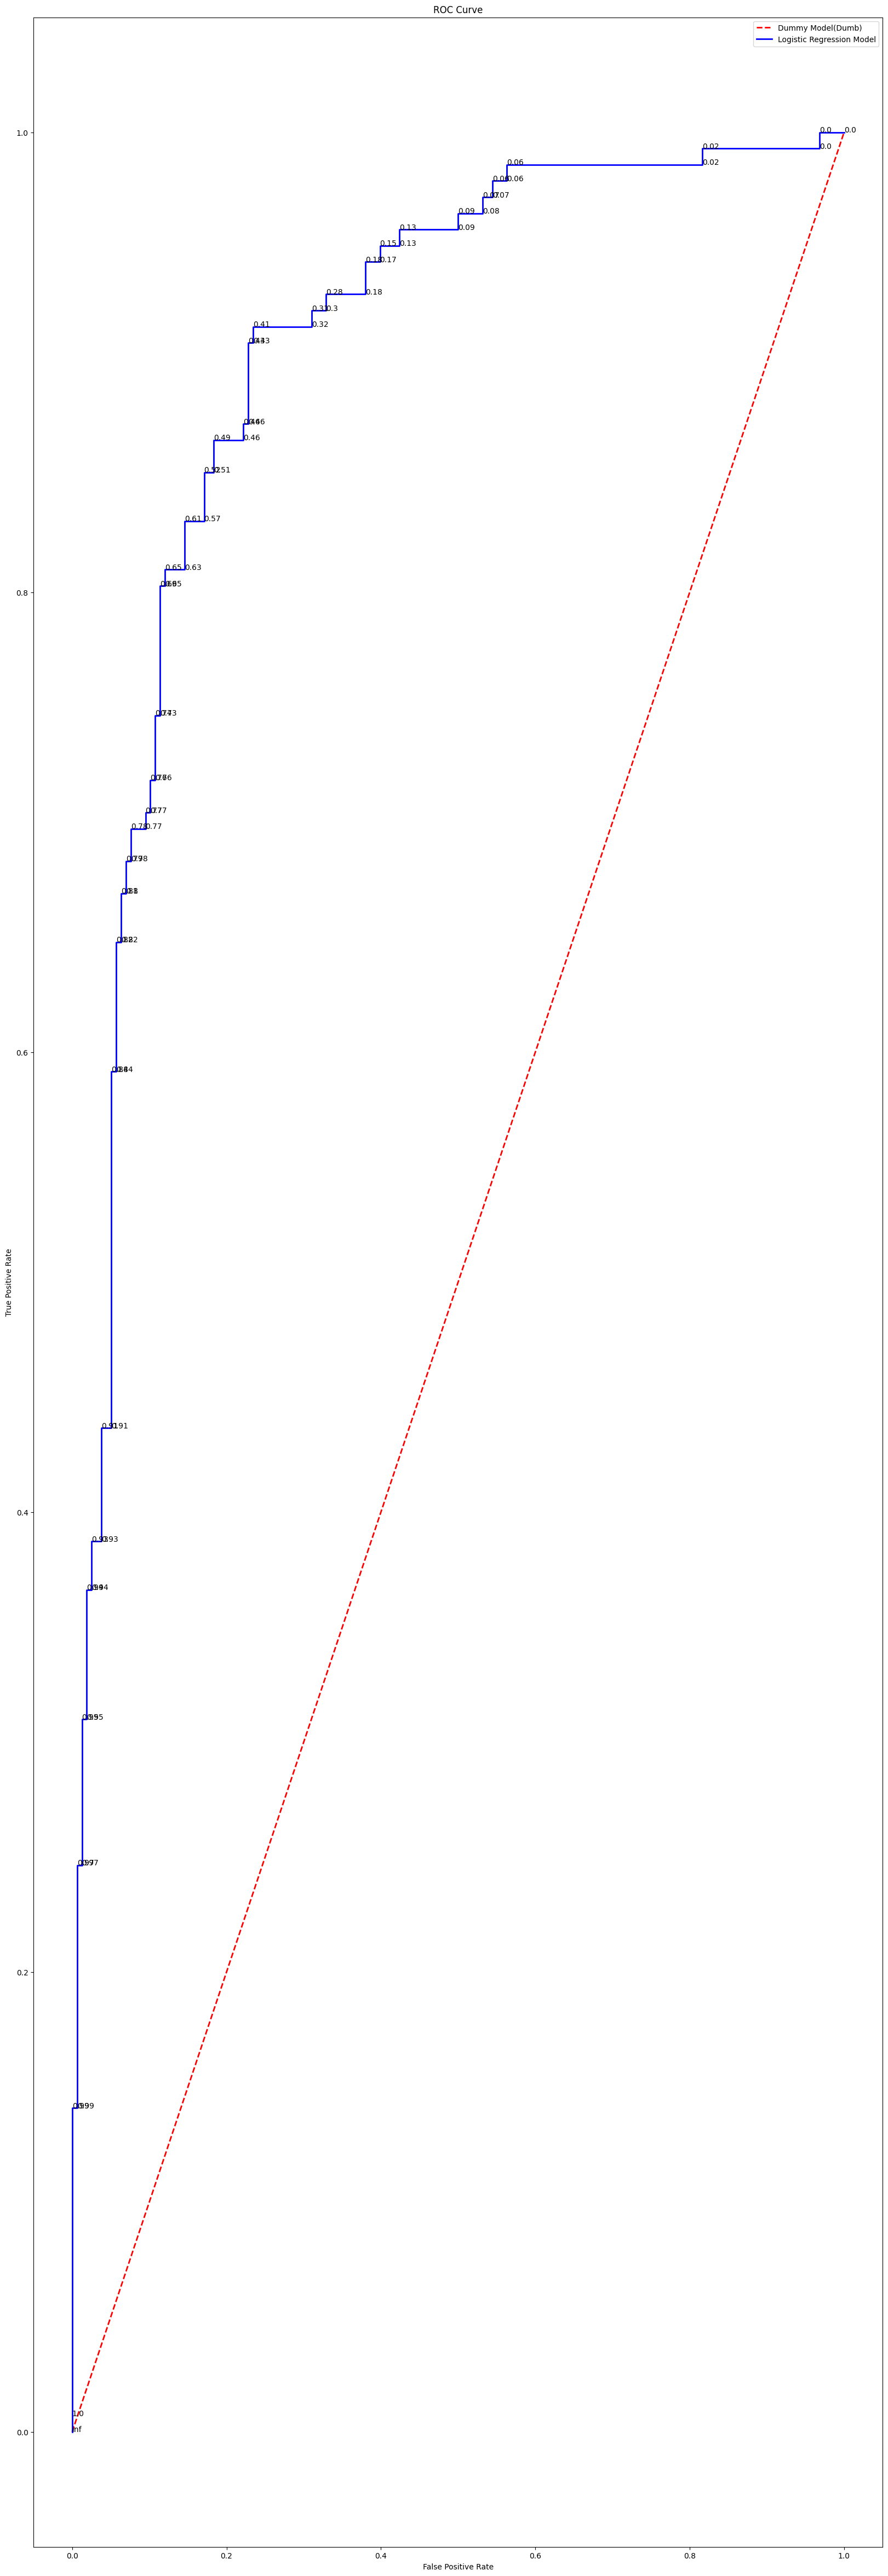

In [35]:
## Plotting the ROC curve for the model
fig = plt.figure(figsize=(20, 60))

ax = fig.add_subplot(111)

for xyz in zip(model_fpr, model_tpr, thresholds):
    ax.annotate('%s' % np.round(xyz[2], 2), xy=(xyz[0], xyz[1]))

plt.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model(Dumb)', 
         color='red', linewidth=2)
plt.plot(model_fpr, model_tpr, label='Logistic Regression Model', 
         color='blue', linewidth=2)

## Axis Labels
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.title("ROC Curve")

## Legend
plt.legend()

plt.show()

1. In ROC space, perfect classification is at point (0,1):
 - FPR = 0 (x-coordinate)
 - TPR = 1 (y-coordinate)
2. For any point (FPR, TPR) on ROC curve:
 - Distance formula = √[(x₂-x₁)² + (y₂-y₁)²]
 - Where (x₁,y₁) is current point and (x₂,y₂) is (0,1)
3. Plugging into distance formula:

Distance = √[(FPR-0)² + (TPR-1)²]
= √[FPR² + (TPR-1)²]
= √[FPR² + (1-TPR)²]

In [36]:
def find_optimal_threshold(fpr, tpr, thresholds):
     """
    Find threshold that gives best trade-off between TPR and FPR
    
    Args:
        fpr: Array of false positive rates
        tpr: Array of true positive rates
        thresholds: Array of thresholds
        
    Returns:
        optimal_threshold: Threshold value that minimizes distance to (0,1)
    """
     # Calculate geometric distance to the perfect point (0,1)
     distances = np.sqrt(fpr**2 + (1-tpr)**2)
     optimal_idx = np.argmin(distances)
    
    # Get optimal threshold
     optimal_threshold = thresholds[optimal_idx]
    
     print(f"Optimal threshold: {optimal_threshold:.3f}")
     print(f"FPR: {fpr[optimal_idx]:.3f}")
     print(f"TPR: {tpr[optimal_idx]:.3f}")
    
     return optimal_threshold

In [37]:
find_optimal_threshold(model_fpr, model_tpr, thresholds)

Optimal threshold: 0.611
FPR: 0.146
TPR: 0.831


np.float64(0.6109313889419755)

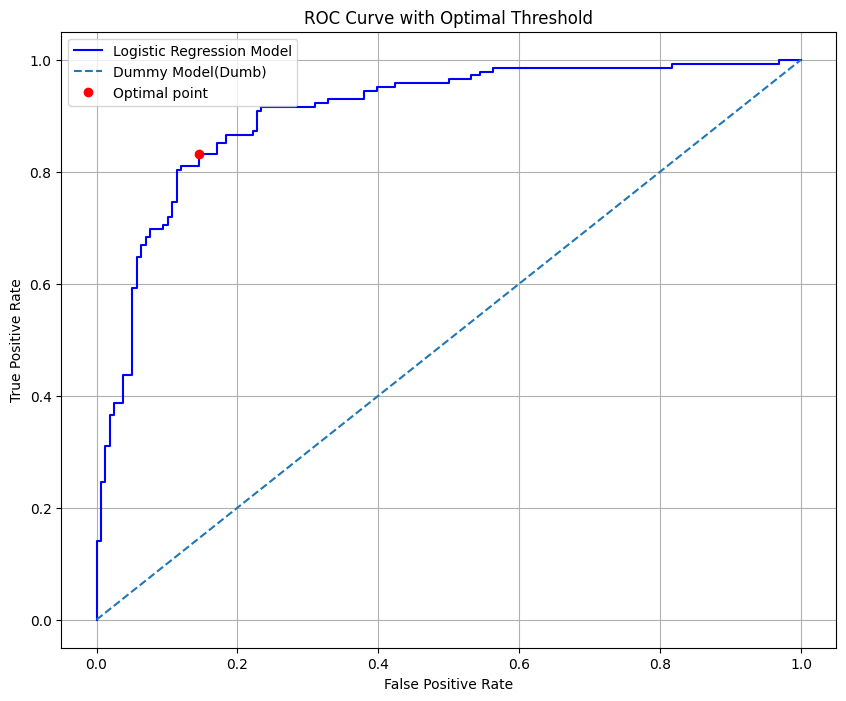

In [41]:
plt.figure(figsize=(10,8))
plt.plot(model_fpr, model_tpr, 'b-', label='Logistic Regression Model')
plt.plot(dummy_fpr, dummy_tpr, '--', label='Dummy Model(Dumb)')
plt.plot(model_fpr[np.argmin(np.sqrt(model_fpr**2 + (1-model_tpr)**2))], 
         model_tpr[np.argmin(np.sqrt(model_fpr**2 + (1-model_tpr)**2))], 
         'ro', label='Optimal point')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Optimal Threshold')
plt.legend()
plt.grid(True)
plt.show()